##### 샘플 데이터

In [75]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [77]:
dataframes = []

for i in range(0, 6) :
    with open(f"./data/헬스 한글 크롤러 파일/health_cluster{i}.pkl", 'rb') as file :
        load_df = pickle.load(file)
    dataframes.append(load_df)
df = pd.concat(dataframes, ignore_index = True)
df

,time,Review,tagged_review,vector,cluster,action_cluster
0,2023. 5. 3. 11:52,좋은시와 글 홈트를 해요 영원한 물론입니다 여러분과 함께 홈트를 즐길 수 있는 영상...,"[좋다, 은시, 글, 홈트, 해, 영원하다, 홈트, 즐기다, 수, 영상, 준비, 영...","[0.8202861, 1.2661822, 0.11358889, 1.4388651, ...",0,1
1,2023. 2. 24. 11:00,질문에 답하기 건강 관리 등산 위치천왕산 내가 사는 곳은 숲세권으로 천왕산과 푸른 ...,"[질문, 답, 건강, 관리, 등산, 위치, 천왕, 산, 내, 살다, 곳, 숲, 권,...","[-0.08157195, 0.18397897, -0.35204706, 0.56169...",0,2
2,2021. 11. 10. 14:00,야외헬스장에서의 운동 야외헬스장에서의 운동 제주에 와서 야외헬스장을 깨알같이 이...,"[야외, 헬스장, 운동, 야외, 헬스장, 운동, 제주, 오다, 야외, 헬스장, 깨알...","[0.74578583, -0.75680375, -0.63614506, 1.05085...",0,3
3,2023. 2. 23. 21:43,리추얼 라이프 나만의 정신 건강 관리 사실 리추얼 라이프라는 단어를 질문을 통해 처...,"[리추얼, 라이프, 정신, 건강, 관리, 사실, 리추얼, 라이프, 단어, 질문, 통...","[-0.8879223, 1.5729215, -1.2553818, -0.1866459...",0,1
4,2022. 9. 13. 14:53,좋은 습관길들이기 데일리 리추얼 브이로그 바미라이프 입니다지난 월 가 배달해준 주제...,"[좋다, 습관, 길들이다, 데, 일리, 리추얼, 브이, 로그, 바, 미라, 이프, ...","[0.56501096, 0.5145636, -1.1823462, 0.7041132,...",0,1
...,...,...,...,...,...,...
761,2023. 4. 16. 17:42,의 양식 다이어트 아침식사 루베리 그릭요거트 스무디 내가 다이어트를 시작한 이후 항...,"[양식, 다이어트, 아침식사, 루베, 리, 그릭, 요거트, 스무디, 내, 다이어트,...","[-0.52687836, 0.43772098, 0.031116791, 1.97182...",5,2
762,2023. 4. 13. 1:26,야매요리 다이어트 레시피 에어프라이어로 만드는 팽이버섯계란전 참 희한하게도 다이어트...,"[야매, 요리, 다이어트, 레시피, 에어, 프라이어, 만들다, 팽이버섯, 계란, 전...","[0.04289189, 0.5977436, -0.52405006, 1.1196404...",5,3
763,2022. 7. 14. 8:33,앨소소한운동 지금 제가 건강을 위해 하는건지하철역에서 내려 집까지 매일 걷는것과저녁...,"[앨, 소소하다, 운동, 지금, 건강, 위해, 지하철역, 내다, 집, 매일, 걷다,...","[0.6241531, 0.5784226, -0.786308, 0.9104195, 0...",5,4
764,2023. 3. 9. 7:40,다이애나 식성이 점점 변하나 보다 내가 샐러드가 먹고 싶다니 심지어 과일도 잘 먹지...,"[다이애나, 식성, 점점, 변하다, 보다, 내, 샐러드, 먹다, 싶다, 과일, 자다...","[-0.70176816, 1.0004972, 0.5578011, 1.6551112,...",5,3


# ◆ 1. Satisfaction
* 1.1 감성사전 불러오기 (SentiWord_info.json)
* 1.2 감성점수 구하는 define 함수 만들기
* 1.3 감성점수 구하기
* 1.4 액션 별로 감성점수 계산해서 df에 추가하기

### 1.1 감성사전 불러오기

In [78]:
import json

In [79]:
with open('./data/SentiWord_info.json', encoding = 'utf-8-sig', mode = 'r') as f :
    sent_dicts = json.load(f)
sent_dicts

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

### 1.2 감성점수 구하는 define 함수 만들기

In [80]:
def sentiment_score(sent_dicts, token_list) :
    result_list = []

    for token in token_list :
        for dict in sent_dicts :
            if token == dict['word'] :
                result = dict['polarity'], dict['word']
                result_list.append(result)

    return (result_list)

In [81]:
sentiment_score(sent_dicts, df['tagged_review'].iloc[0])

[('2', '좋다'),
 ('-2', '해'),
 ('2', '즐기다'),
 ('1', '강화하다'),
 ('1', '다양하다'),
 ('2', '즐겁다'),
 ('1', '다양하다'),
 ('2', '즐겁다'),
 ('-2', '부상'),
 ('1', '예방'),
 ('1', '향상'),
 ('1', '도움'),
 ('2', '건강하다'),
 ('2', '건강하다')]

In [82]:
# csv로 저장해서 단어 하나하나씩 나눠져서 나오는 문제 해결 방법 (감성분석 제대로 된다면 할 필요 없음)
df['tagged_review'] = df['tagged_review'].apply(lambda x : str(x))

In [83]:
df['tagged_review'] = df['tagged_review'].apply(eval)

### 1.3  감성점수 구하기

#### 1.3.1 적합하게 형태소 재분리

In [ ]:
# !pip install konlpy

In [84]:
from konlpy.tag import Okt
okt=Okt()

In [85]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem = True, norm = True)

    tagged_list = []
    for word, tag in pos_words :
        if tag in ['Noun', 'Adjective', 'Verb', 'VerbPrefix'] : # VerbPrefix : 부정적인 단어
                tagged_list.append(word)
    return tagged_list


#### 1.3.2 감정점수 적용하기

In [86]:
sentiment = []
for i in tqdm(df['Review']) :
    token = okt_pos_tagging(i)
    score = sentiment_score(sent_dicts, token)
    sentiment.append(score)
sentiment

100%|██████████| 766/766 [01:12<00:00, 10.52it/s]


[[('2', '좋다'),
  ('-2', '해'),
  ('2', '즐기다'),
  ('1', '강화하다'),
  ('1', '다양하다'),
  ('2', '즐겁다'),
  ('1', '다양하다'),
  ('2', '즐겁다'),
  ('-2', '부상'),
  ('1', '예방'),
  ('1', '향상'),
  ('1', '도움'),
  ('2', '건강하다'),
  ('2', '건강하다')],
 [('2', '좋다'), ('0', '못'), ('1', '정상'), ('2', '좋다')],
 [('2', '좋다'), ('-2', '아니다'), ('-2', '아니다'), ('1', '클라스'), ('-1', '없다')],
 [('1', '배우다'),
  ('1', '받다'),
  ('2', '좋다'),
  ('2', '좋아지다'),
  ('2', '행복하다'),
  ('2', '편하다'),
  ('2', '좋다'),
  ('-2', '스트레스'),
  ('-2', '버리다'),
  ('1', '휴식'),
  ('2', '행복하다'),
  ('1', '휴식'),
  ('2', '재미있다'),
  ('2', '좋아하다'),
  ('-2', '잘못'),
  ('-1', '실수'),
  ('-2', '아니다'),
  ('1', '다양하다'),
  ('-1', '이상하다'),
  ('2', '맑다'),
  ('2', '편하다')],
 [('2', '좋다'),
  ('2', '좋다'),
  ('-1', '포기'),
  ('2', '성공'),
  ('2', '사랑'),
  ('2', '감사'),
  ('2', '사랑'),
  ('1', '베풀다'),
  ('-1', '깨지다'),
  ('-1', '틀어지다'),
  ('1', '중요하다'),
  ('-1', '없다'),
  ('-2', '해'),
  ('-1', '게으르다'),
  ('-1', '미루다'),
  ('0', '못'),
  ('-2', '미워하다'),
  ('1', '아끼다'),
  ('-2', '해'),
 

In [87]:
# 감성점수 평균 구하기
sentiment_score = []
for sent in tqdm(sentiment) :
    score = []
    for s in sent :
        score.append(int(s[0]))

    if len(score) == 0 :
        sentiment_score.append(0)
    else :
        sentiment_score.append(np.mean(score))
    
df['sentiment_score'] = sentiment_score
df

100%|██████████| 766/766 [00:00<00:00, 38040.65it/s]


,time,Review,tagged_review,vector,cluster,action_cluster,sentiment_score
0,2023. 5. 3. 11:52,좋은시와 글 홈트를 해요 영원한 물론입니다 여러분과 함께 홈트를 즐길 수 있는 영상...,"[좋다, 은시, 글, 홈트, 해, 영원하다, 홈트, 즐기다, 수, 영상, 준비, 영...","[0.8202861, 1.2661822, 0.11358889, 1.4388651, ...",0,1,1.000000
1,2023. 2. 24. 11:00,질문에 답하기 건강 관리 등산 위치천왕산 내가 사는 곳은 숲세권으로 천왕산과 푸른 ...,"[질문, 답, 건강, 관리, 등산, 위치, 천왕, 산, 내, 살다, 곳, 숲, 권,...","[-0.08157195, 0.18397897, -0.35204706, 0.56169...",0,2,1.250000
2,2021. 11. 10. 14:00,야외헬스장에서의 운동 야외헬스장에서의 운동 제주에 와서 야외헬스장을 깨알같이 이...,"[야외, 헬스장, 운동, 야외, 헬스장, 운동, 제주, 오다, 야외, 헬스장, 깨알...","[0.74578583, -0.75680375, -0.63614506, 1.05085...",0,3,-0.400000
3,2023. 2. 23. 21:43,리추얼 라이프 나만의 정신 건강 관리 사실 리추얼 라이프라는 단어를 질문을 통해 처...,"[리추얼, 라이프, 정신, 건강, 관리, 사실, 리추얼, 라이프, 단어, 질문, 통...","[-0.8879223, 1.5729215, -1.2553818, -0.1866459...",0,1,0.714286
4,2022. 9. 13. 14:53,좋은 습관길들이기 데일리 리추얼 브이로그 바미라이프 입니다지난 월 가 배달해준 주제...,"[좋다, 습관, 길들이다, 데, 일리, 리추얼, 브이, 로그, 바, 미라, 이프, ...","[0.56501096, 0.5145636, -1.1823462, 0.7041132,...",0,1,0.694444
...,...,...,...,...,...,...,...
761,2023. 4. 16. 17:42,의 양식 다이어트 아침식사 루베리 그릭요거트 스무디 내가 다이어트를 시작한 이후 항...,"[양식, 다이어트, 아침식사, 루베, 리, 그릭, 요거트, 스무디, 내, 다이어트,...","[-0.52687836, 0.43772098, 0.031116791, 1.97182...",5,2,0.800000
762,2023. 4. 13. 1:26,야매요리 다이어트 레시피 에어프라이어로 만드는 팽이버섯계란전 참 희한하게도 다이어트...,"[야매, 요리, 다이어트, 레시피, 에어, 프라이어, 만들다, 팽이버섯, 계란, 전...","[0.04289189, 0.5977436, -0.52405006, 1.1196404...",5,3,0.600000
763,2022. 7. 14. 8:33,앨소소한운동 지금 제가 건강을 위해 하는건지하철역에서 내려 집까지 매일 걷는것과저녁...,"[앨, 소소하다, 운동, 지금, 건강, 위해, 지하철역, 내다, 집, 매일, 걷다,...","[0.6241531, 0.5784226, -0.786308, 0.9104195, 0...",5,4,-0.166667
764,2023. 3. 9. 7:40,다이애나 식성이 점점 변하나 보다 내가 샐러드가 먹고 싶다니 심지어 과일도 잘 먹지...,"[다이애나, 식성, 점점, 변하다, 보다, 내, 샐러드, 먹다, 싶다, 과일, 자다...","[-0.70176816, 1.0004972, 0.5578011, 1.6551112,...",5,3,0.736842


### 1.4 전체 액터와 액션에 대해서 감성점수 계산


#### 1.4.1 dict 형식으로 출력


In [88]:
df.cluster.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [89]:
action_sents = dict()
for actor in df.cluster.unique() :
    actor_df = df[df['cluster'] == actor]

    for i in actor_df.action_cluster.unique() :
        action_score = actor_df[actor_df['action_cluster'] == i].sentiment_score
        action_score = np.mean(action_score)
        action_sents[f'Actor{actor}_Action{i}'] = action_score

action_sents

{'Actor0_Action1': 0.1550072555262082,
 'Actor0_Action2': 0.26684176320998426,
 'Actor0_Action3': 0.3625244577333887,
 'Actor0_Action6': 0.40709654843801185,
 'Actor0_Action4': 0.48763815991337406,
 'Actor0_Action5': 0.39980860409970975,
 'Actor1_Action1': 0.14587450612044553,
 'Actor1_Action2': -0.00024992224233628426,
 'Actor1_Action3': -0.04696922241679275,
 'Actor1_Action4': 0.484509947915745,
 'Actor2_Action1': 0.6717045597166508,
 'Actor2_Action2': 0.5715267488744841,
 'Actor2_Action3': 0.08698248667069322,
 'Actor2_Action4': 0.1673760102331531,
 'Actor2_Action5': 0.7044222133297763,
 'Actor3_Action4': 0.25869197851956477,
 'Actor3_Action1': 0.28459846829022206,
 'Actor3_Action2': 0.3533532957524078,
 'Actor3_Action3': 0.19248561024903557,
 'Actor4_Action2': -0.1248257726750374,
 'Actor4_Action1': 0.1438258725422139,
 'Actor4_Action3': 0.13192132593541042,
 'Actor4_Action5': 0.06933268256797669,
 'Actor4_Action4': 0.511792328042328,
 'Actor5_Action1': 0.4895824914720263,
 'Actor5

#### 1.4.2 정규화 (0~10)
* minmaxscaler를 이용해서 정규화 : 주어진 데이터를 특정 범위로 변환(정규화)하는 데 사용
* minmaxscaler은 배열(array 데이터 형식, shape이 1이어야 작동)로 변환필요 

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
data = action_sents.values()
data = np.array(list(data)).reshape(-1, 1)
data

array([[ 1.55007256e-01],
       [ 2.66841763e-01],
       [ 3.62524458e-01],
       [ 4.07096548e-01],
       [ 4.87638160e-01],
       [ 3.99808604e-01],
       [ 1.45874506e-01],
       [-2.49922242e-04],
       [-4.69692224e-02],
       [ 4.84509948e-01],
       [ 6.71704560e-01],
       [ 5.71526749e-01],
       [ 8.69824867e-02],
       [ 1.67376010e-01],
       [ 7.04422213e-01],
       [ 2.58691979e-01],
       [ 2.84598468e-01],
       [ 3.53353296e-01],
       [ 1.92485610e-01],
       [-1.24825773e-01],
       [ 1.43825873e-01],
       [ 1.31921326e-01],
       [ 6.93326826e-02],
       [ 5.11792328e-01],
       [ 4.89582491e-01],
       [ 3.64583333e-01],
       [ 3.70634629e-01],
       [ 9.40481546e-01],
       [ 6.73809524e-01],
       [ 5.74048521e-01]])

In [92]:
scaler = MinMaxScaler(feature_range = (-10, 10))
transposed_data = scaler.fit_transform(data)
transposed_data

array([[ -4.74643564],
       [ -2.64686295],
       [ -0.85052319],
       [ -0.01373009],
       [  1.49835211],
       [ -0.15055341],
       [ -4.91789319],
       [ -7.66122229],
       [ -8.53832694],
       [  1.43962329],
       [  4.95400095],
       [  3.07327021],
       [ -6.02352756],
       [ -4.51422556],
       [  5.56823973],
       [ -2.79986639],
       [ -2.31349989],
       [ -1.0227019 ],
       [ -4.04281981],
       [-10.        ],
       [ -4.95635409],
       [ -5.17984915],
       [ -6.35488367],
       [  1.95182066],
       [  1.53485484],
       [ -0.81187001],
       [ -0.69826345],
       [ 10.        ],
       [  4.99351938],
       [  3.12061377]])

In [93]:
# 방법1: for 문으로 풀어주기
# 방법2: flatten 사용하기 -> 1차원으로 풀어짐
score_result = transposed_data.flatten().tolist() # 1차원으로 풀고 list화
score_result


[-4.746435636688478,
 -2.646862945313946,
 -0.8505231874056172,
 -0.01373008678671539,
 1.4983521092660865,
 -0.15055340926445648,
 -4.917893191665384,
 -7.661222291845421,
 -8.538326942619042,
 1.4396232909515856,
 4.954000946379452,
 3.0732702105619456,
 -6.023527564610681,
 -4.514225559970099,
 5.568239730764381,
 -2.799866394168662,
 -2.3134998908560496,
 -1.0227018971996173,
 -4.042819805372832,
 -10.0,
 -4.956354085396416,
 -5.179849153926734,
 -6.354883668103858,
 1.9518206570046654,
 1.5348548446746157,
 -0.8118700107241921,
 -0.6982634468453597,
 9.999999999999998,
 4.993519384983543,
 3.120613770592632]

In [94]:
for key, new_value in zip(action_sents.keys(), score_result) :
    action_sents[key] = new_value
action_sents

{'Actor0_Action1': -4.746435636688478,
 'Actor0_Action2': -2.646862945313946,
 'Actor0_Action3': -0.8505231874056172,
 'Actor0_Action6': -0.01373008678671539,
 'Actor0_Action4': 1.4983521092660865,
 'Actor0_Action5': -0.15055340926445648,
 'Actor1_Action1': -4.917893191665384,
 'Actor1_Action2': -7.661222291845421,
 'Actor1_Action3': -8.538326942619042,
 'Actor1_Action4': 1.4396232909515856,
 'Actor2_Action1': 4.954000946379452,
 'Actor2_Action2': 3.0732702105619456,
 'Actor2_Action3': -6.023527564610681,
 'Actor2_Action4': -4.514225559970099,
 'Actor2_Action5': 5.568239730764381,
 'Actor3_Action4': -2.799866394168662,
 'Actor3_Action1': -2.3134998908560496,
 'Actor3_Action2': -1.0227018971996173,
 'Actor3_Action3': -4.042819805372832,
 'Actor4_Action2': -10.0,
 'Actor4_Action1': -4.956354085396416,
 'Actor4_Action3': -5.179849153926734,
 'Actor4_Action5': -6.354883668103858,
 'Actor4_Action4': 1.9518206570046654,
 'Actor5_Action1': 1.5348548446746157,
 'Actor5_Action4': -0.81187001072

# ◆ 2. Importance
* 2.1 importance 점수 구하기 _ 전체 토픽의 비중
* 2.2 importance 점수 정규화

### 2-1. Importance 점수 구하기

In [95]:
from collections import Counter

In [96]:
# action 개수
importance_check = []
for actor, action in zip(df['cluster'], df['action_cluster']) :
    importance_check.append('Actor' + str(actor) + '_' + 'Action' + str(action))
importance_check

['Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action6',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action5',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action6',
 'Actor0_Action2',
 'Actor0_Action6',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action6',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action6',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action5',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action6',
 'Actor0_Action5',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action5',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Act

In [97]:
frequency = Counter(importance_check)
frequency

Counter({'Actor4_Action1': 98,
         'Actor4_Action2': 80,
         'Actor4_Action3': 71,
         'Actor4_Action4': 60,
         'Actor4_Action5': 51,
         'Actor1_Action1': 36,
         'Actor0_Action2': 33,
         'Actor0_Action1': 31,
         'Actor2_Action1': 25,
         'Actor3_Action1': 25,
         'Actor2_Action2': 24,
         'Actor0_Action3': 20,
         'Actor0_Action4': 19,
         'Actor2_Action3': 19,
         'Actor3_Action2': 19,
         'Actor3_Action3': 18,
         'Actor0_Action5': 15,
         'Actor1_Action2': 13,
         'Actor1_Action3': 13,
         'Actor3_Action4': 13,
         'Actor5_Action3': 13,
         'Actor5_Action1': 11,
         'Actor0_Action6': 10,
         'Actor1_Action4': 9,
         'Actor5_Action4': 8,
         'Actor5_Action5': 8,
         'Actor2_Action4': 7,
         'Actor2_Action5': 7,
         'Actor5_Action2': 7,
         'Actor5_Action6': 3})

In [98]:
# 중요도 사전 만들기
importance_dict = dict()

# 전체 합
total_count = sum(frequency.values())

# 빈도수 / 전체값 * 100
for item, value in frequency.items() :
    importance = (value / total_count) * 100
    importance_dict[item] = importance
    
importance_dict

{'Actor0_Action1': 4.046997389033943,
 'Actor0_Action2': 4.308093994778068,
 'Actor0_Action3': 2.610966057441253,
 'Actor0_Action6': 1.3054830287206265,
 'Actor0_Action4': 2.4804177545691903,
 'Actor0_Action5': 1.95822454308094,
 'Actor1_Action1': 4.699738903394255,
 'Actor1_Action2': 1.6971279373368149,
 'Actor1_Action3': 1.6971279373368149,
 'Actor1_Action4': 1.1749347258485638,
 'Actor2_Action1': 3.263707571801567,
 'Actor2_Action2': 3.1331592689295036,
 'Actor2_Action3': 2.4804177545691903,
 'Actor2_Action4': 0.9138381201044387,
 'Actor2_Action5': 0.9138381201044387,
 'Actor3_Action4': 1.6971279373368149,
 'Actor3_Action1': 3.263707571801567,
 'Actor3_Action2': 2.4804177545691903,
 'Actor3_Action3': 2.3498694516971277,
 'Actor4_Action2': 10.443864229765012,
 'Actor4_Action1': 12.793733681462141,
 'Actor4_Action3': 9.26892950391645,
 'Actor4_Action5': 6.657963446475196,
 'Actor4_Action4': 7.83289817232376,
 'Actor5_Action1': 1.4360313315926894,
 'Actor5_Action4': 1.0443864229765014,

### 2-2. Importance 점수 정규화(0~10)

In [99]:
data = importance_dict.values()

# array 형태로 변환
data = np.array(list(data)).reshape(-1, 1)

In [100]:
scaler = MinMaxScaler(feature_range = (0, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 2.94736842],
       [ 3.15789474],
       [ 1.78947368],
       [ 0.73684211],
       [ 1.68421053],
       [ 1.26315789],
       [ 3.47368421],
       [ 1.05263158],
       [ 1.05263158],
       [ 0.63157895],
       [ 2.31578947],
       [ 2.21052632],
       [ 1.68421053],
       [ 0.42105263],
       [ 0.42105263],
       [ 1.05263158],
       [ 2.31578947],
       [ 1.68421053],
       [ 1.57894737],
       [ 8.10526316],
       [10.        ],
       [ 7.15789474],
       [ 5.05263158],
       [ 6.        ],
       [ 0.84210526],
       [ 0.52631579],
       [ 0.42105263],
       [ 1.05263158],
       [ 0.        ],
       [ 0.52631579]])

In [101]:
score_result = transformed_data.flatten().tolist()
score_result = [round(i, 4) for i in score_result]
score_result

[2.9474,
 3.1579,
 1.7895,
 0.7368,
 1.6842,
 1.2632,
 3.4737,
 1.0526,
 1.0526,
 0.6316,
 2.3158,
 2.2105,
 1.6842,
 0.4211,
 0.4211,
 1.0526,
 2.3158,
 1.6842,
 1.5789,
 8.1053,
 10.0,
 7.1579,
 5.0526,
 6.0,
 0.8421,
 0.5263,
 0.4211,
 1.0526,
 0.0,
 0.5263]

In [102]:
# value 값 교체
for key, new_value in zip(importance_dict.keys(), score_result) :
    importance_dict[key] = new_value
importance_dict

{'Actor0_Action1': 2.9474,
 'Actor0_Action2': 3.1579,
 'Actor0_Action3': 1.7895,
 'Actor0_Action6': 0.7368,
 'Actor0_Action4': 1.6842,
 'Actor0_Action5': 1.2632,
 'Actor1_Action1': 3.4737,
 'Actor1_Action2': 1.0526,
 'Actor1_Action3': 1.0526,
 'Actor1_Action4': 0.6316,
 'Actor2_Action1': 2.3158,
 'Actor2_Action2': 2.2105,
 'Actor2_Action3': 1.6842,
 'Actor2_Action4': 0.4211,
 'Actor2_Action5': 0.4211,
 'Actor3_Action4': 1.0526,
 'Actor3_Action1': 2.3158,
 'Actor3_Action2': 1.6842,
 'Actor3_Action3': 1.5789,
 'Actor4_Action2': 8.1053,
 'Actor4_Action1': 10.0,
 'Actor4_Action3': 7.1579,
 'Actor4_Action5': 5.0526,
 'Actor4_Action4': 6.0,
 'Actor5_Action1': 0.8421,
 'Actor5_Action4': 0.5263,
 'Actor5_Action2': 0.4211,
 'Actor5_Action3': 1.0526,
 'Actor5_Action6': 0.0,
 'Actor5_Action5': 0.5263}

# ◆ 3. Opportunity
* 3.1 Opportunity score
* 3.2 Opportunity area

### 3.1 Opportunity score
Opportunity = Importance + Max(Importance-Satisfaction, 0)

In [103]:
def opportunity_score(satisfaction, importance) :
    result = importance + max(importance - satisfaction, 0)
    return result

In [104]:
# 감성점수 / opportunity_score 데이터프레임화 하려고 하는데 df 먼저 만들고 opportunity_list 추가하겠다
opportunity_df = pd.DataFrame(action_sents.items(), columns = ['Action', 'satisfaction'])
opportunity_df

,Action,satisfaction
0,Actor0_Action1,-4.746436
1,Actor0_Action2,-2.646863
2,Actor0_Action3,-0.850523
3,Actor0_Action6,-0.013730
4,Actor0_Action4,1.498352
5,Actor0_Action5,-0.150553
6,Actor1_Action1,-4.917893
7,Actor1_Action2,-7.661222
8,Actor1_Action3,-8.538327
9,Actor1_Action4,1.439623


In [105]:
# importance 도 추가
opportunity_df['importance'] = importance_dict.values()
opportunity_df

,Action,satisfaction,importance
0,Actor0_Action1,-4.746436,2.9474
1,Actor0_Action2,-2.646863,3.1579
2,Actor0_Action3,-0.850523,1.7895
3,Actor0_Action6,-0.013730,0.7368
4,Actor0_Action4,1.498352,1.6842
5,Actor0_Action5,-0.150553,1.2632
6,Actor1_Action1,-4.917893,3.4737
7,Actor1_Action2,-7.661222,1.0526
8,Actor1_Action3,-8.538327,1.0526
9,Actor1_Action4,1.439623,0.6316


In [106]:
# opportunity_score 추가하기
# 기회 점수 df에 계산하고 추가하기
opportunity_list = []
for i, j in zip(opportunity_df['satisfaction'], opportunity_df['importance']) :
    # i : 이름 j : 점수
    score_result = opportunity_score(i, j)
    opportunity_list.append(score_result)

opportunity_df['opportunity_score'] = opportunity_list
opportunity_df

,Action,satisfaction,importance,opportunity_score
0,Actor0_Action1,-4.746436,2.9474,10.641236
1,Actor0_Action2,-2.646863,3.1579,8.962663
2,Actor0_Action3,-0.850523,1.7895,4.429523
3,Actor0_Action6,-0.013730,0.7368,1.487330
4,Actor0_Action4,1.498352,1.6842,1.870048
5,Actor0_Action5,-0.150553,1.2632,2.676953
6,Actor1_Action1,-4.917893,3.4737,11.865293
7,Actor1_Action2,-7.661222,1.0526,9.766422
8,Actor1_Action3,-8.538327,1.0526,10.643527
9,Actor1_Action4,1.439623,0.6316,0.631600


In [107]:
# Action 정렬
opportunity_df.sort_values(by = 'Action', inplace = True)

# csv 저장
opportunity_df.to_csv('Opportunity Score.csv', encoding = 'utf-8-sig')

### 3.2 Opportunity area

In [108]:
!pip install adjustText

In [109]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [110]:
# 데이터 세팅
satisfaction = opportunity_df.satisfaction
importance = opportunity_df.importance
actions = opportunity_df.Action

color = np.random.rand(len(actions), 3)

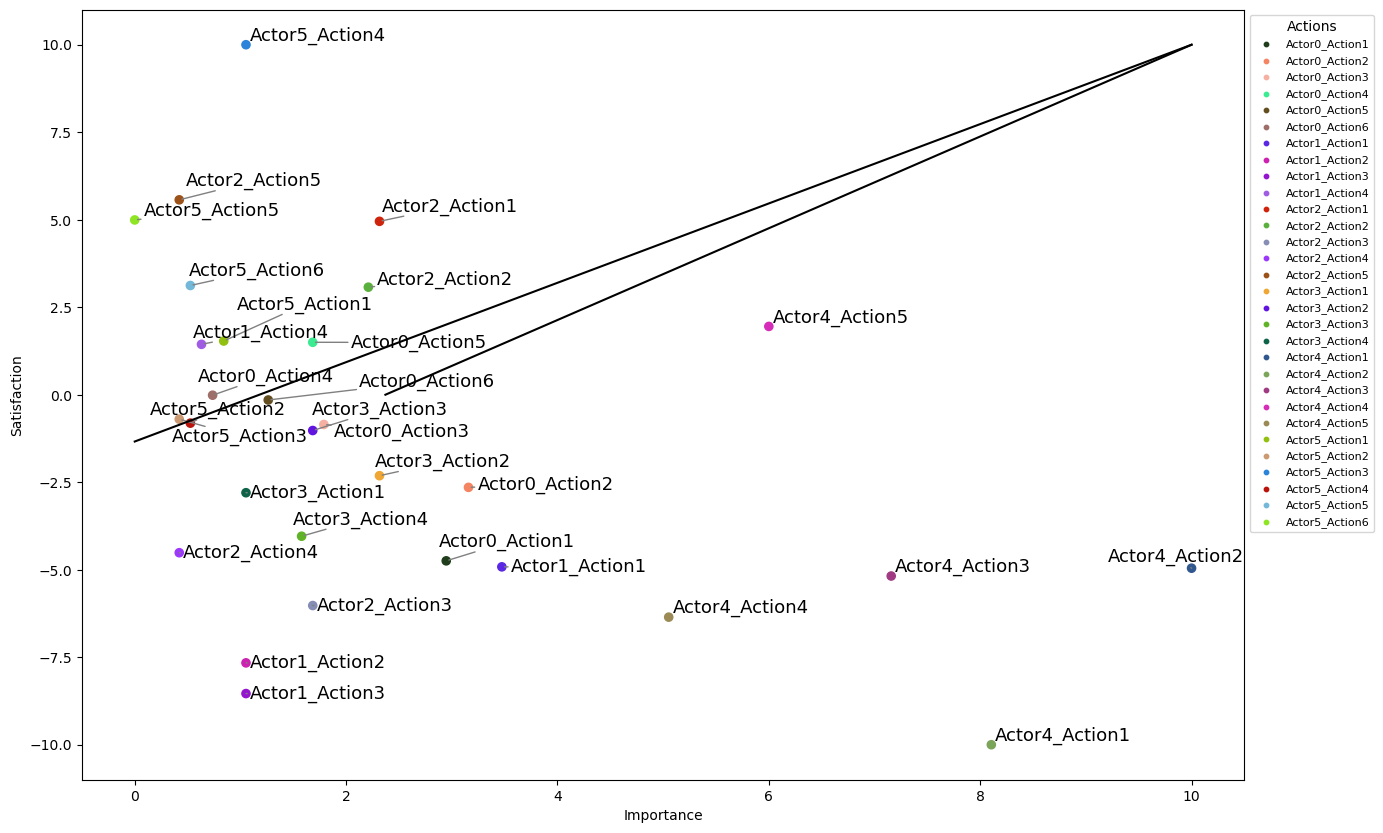

In [111]:
plt.figure(figsize = (15, 10)) # inch
plt.scatter(importance, satisfaction, s = 35, c = color) # s : 점의 사이즈 / c : 색상

# 라벨 이름
plt.xlabel("Importance")
plt.ylabel("Satisfaction")

# 중요도 기준선
xdata = [importance.mean(), 10]
ydata = [0, 10]
plt.plot(xdata, ydata, 'k')

# 만족도 기준선
xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k')

# 점에 이름 붙이기 + 위치 조정
texts = []
for i, action in enumerate(actions) :
    texts.append(plt.text(importance[i], satisfaction[i], action, fontsize = 13))

# 위치 조정
adjust_text(texts,
            arrowprops = dict(arrowstyle = '-', color = 'grey', lw = 1)) # lw : 선의 두께

# 색상 범례 추가
for i, action in enumerate(actions):
    plt.scatter([], [], c=[color[i]], label=action, s=10)
 
plt.legend(title = 'Actions', fontsize=8, title_fontsize='10', loc='upper left', bbox_to_anchor=(1,1))

plt.show()